In [151]:
# Dieu
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas_profiling import ProfileReport
from pprint import pprint
#### Plotting
import seaborn as sns
import matplotlib.pyplot as plt
#Sklearn
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

import os

## 4. Résoudre le cas d’étude présenté ci-dessus avec la librairie Scikit-Learn (exploration des données, préparation des données, modélisation, le test et l’interprétation des résultats).

In [108]:
df = pd.read_csv('../data/cardio_train.csv', sep=';', index_col=0)
df['age'] = np.floor(df['age'] / 365.25)
Y = df['cardio'].replace({0:1,1:2})
X = df.loc[:, df.columns != 'cardio']

In [109]:
# prof = ProfileReport(df)
# prof.to_file(output_file='rapport.html')

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25,random_state=2019)

In [133]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [134]:
X = [[52*365]]
rf = RandomForestClassifier(random_state=2019)

best_grid_param =  {
    'bootstrap': True,
    'max_depth': 100,
    'max_features': 2,
    'min_samples_leaf': 5,
    'min_samples_split': 10,
    'n_estimators': 300
    }
    
rf.set_params(**best_grid_param)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7344571428571428


<AxesSubplot:>

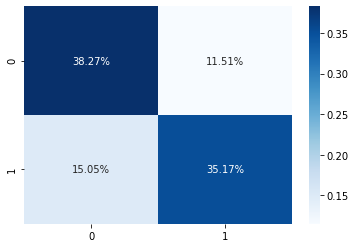

In [153]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

## 3. Visualiser et analyser les données avec les librairies Matplotlib et Seaborn.

Feature ranking:
1 ap_hi 0.36732662746535516
2 ap_lo 0.15763271707743493
3 age 0.15399169694932843
4 weight 0.11634780788954487
5 height 0.08501257472966335
6 cholesterol 0.07591196367190663
7 gluc 0.015731732615881015
8 active 0.00951694919604557
9 gender 0.008989340414347064
10 smoke 0.005531892881414001
11 alco 0.004006697109078981


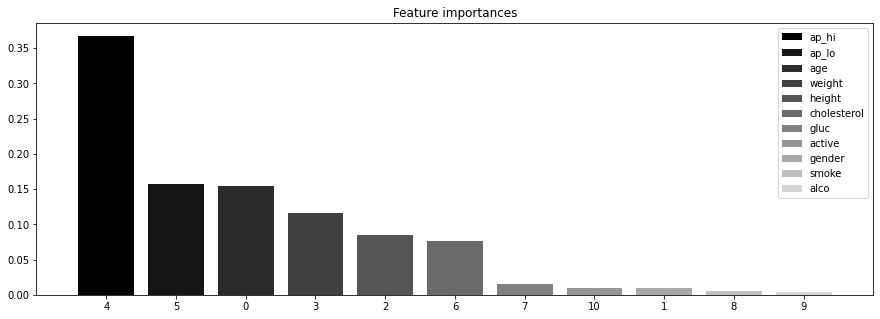

In [144]:
features = dict(zip(range(len(df.columns)-1), df.columns[:-1]))

# Важность признаков
importances = rf.feature_importances_

indices = np.argsort(importances)[::-1]
# Plot the feature importancies of the forest
num_to_plot = max(10, len(df.columns[:-1]))
feature_indices = [ind for ind in indices[:num_to_plot]]

# Print the feature ranking
print("Feature ranking:")

for f in range(num_to_plot):
    print(f+1, features[feature_indices[f]], importances[indices[f]])

plt.figure(figsize=(15,5))
plt.title("Feature importances")
bars = plt.bar(range(num_to_plot), 
               importances[indices[:num_to_plot]],
               color=([str(i/float(num_to_plot+1)) for i in range(num_to_plot)]),
               align="center")
ticks = plt.xticks(range(num_to_plot), 
                   feature_indices)
plt.xlim([-1, num_to_plot])
plt.legend(bars, [u''.join(features[i]) for i in feature_indices]);

In [145]:
matrice_corr = df.corr(method='spearman').style.format("{:.3}").background_gradient(cmap=plt.get_cmap('coolwarm'))
matrice_corr

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.0,-0.0205,-0.0834,0.063,0.22,0.158,0.142,0.0919,-0.0472,-0.0298,-0.0101,0.235
gender,-0.0205,1.0,0.534,0.172,0.0632,0.0664,-0.0357,-0.0189,0.338,0.171,0.00587,0.00811
height,-0.0834,0.534,1.0,0.314,0.0194,0.0305,-0.0589,-0.0244,0.198,0.0967,-0.00737,-0.0124
weight,0.063,0.172,0.314,1.0,0.278,0.254,0.138,0.11,0.0717,0.0681,-0.0149,0.183
ap_hi,0.22,0.0632,0.0194,0.278,1.0,0.735,0.209,0.105,0.0289,0.0332,-0.00127,0.452
ap_lo,0.158,0.0664,0.0305,0.254,0.735,1.0,0.167,0.0825,0.0262,0.0389,0.0034,0.363
cholesterol,0.142,-0.0357,-0.0589,0.138,0.209,0.167,1.0,0.408,0.0152,0.0413,0.00757,0.215
gluc,0.0919,-0.0189,-0.0244,0.11,0.105,0.0825,0.408,1.0,0.000468,0.0186,-0.00861,0.0915
smoke,-0.0472,0.338,0.198,0.0717,0.0289,0.0262,0.0152,0.000468,1.0,0.34,0.0259,-0.0155
alco,-0.0298,0.171,0.0967,0.0681,0.0332,0.0389,0.0413,0.0186,0.34,1.0,0.0255,-0.00733


## 5. Prédire Arthur
53 ans, fumeur, sportif, 175 cm, 85 kg, avec un taux de cholestérol au dessus de la normal et un taux de glucose normal, une tension artérielle systolique dans la moyenne et une pression sanguine diastolique correspondant à la moyenne du 3e quartile (50%-75%) du jeu de données, est un sujet à risques cardio-vasculaires.

In [146]:
pr_hi= df.ap_hi.mean()
pr_lo = df.ap_lo.quantile(q=[0.5,0.75]).mean()

arthur = [[53*365,2,175,85,pr_hi,pr_lo,2,1,1,0,1]]
arthur_alco = [[53*365,2,175,85,pr_hi,pr_lo,2,1,1,1,1]]

rf.predict(arthur)
pred_arthur = rf.predict_proba(arthur)
pred_arthur_alco = rf.predict_proba(arthur_alco)
print('arthur :',pred_arthur,'arthur alco :',pred_arthur_alco)


arthur : [[0.17784215 0.82215785]] arthur alco : [[0.17784215 0.82215785]]


In [147]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.72      0.77      0.74      8712
           2       0.75      0.70      0.73      8788

    accuracy                           0.73     17500
   macro avg       0.74      0.73      0.73     17500
weighted avg       0.74      0.73      0.73     17500



In [117]:
df = pd.read_csv('../data/cardio_train.csv', sep=';', index_col=0)
df['age'] = np.floor(df['age'] / 365.25)
df1 = df.copy()
Y = df1['cardio'].replace({0:1,1:2})
X = df1.loc[:, df1.columns != 'cardio']

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25,random_state=2019)

In [119]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
best_grid_param =  {
    'bootstrap': True,
    'max_depth': 100,
    'max_features': 2,
    'min_samples_leaf': 5,
    'min_samples_split': 10,
    'n_estimators': 300
    }

## 2. Grid Search with Cross Validation
source : https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True,False],
    'criterion': ['gini','entropy'],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
    }

# Create a based model
rf = RandomForestClassifier()# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [129]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

# Fitting 3 folds for each of 576 candidates, totalling 1728 fits
# [Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
# [Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   51.9s
# [Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  4.9min
# [Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 12.0min
# [Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 22.2min
# [Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 36.2min
# [Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 57.4min
# [Parallel(n_jobs=-1)]: Done 1728 out of 1728 | elapsed: 71.7min finished
# {'bootstrap': True,
#  'max_depth': 100,
#  'max_features': 2,
#  'min_samples_leaf': 5,
#  'min_samples_split': 10,
#  'n_estimators': 300}

Fitting 3 folds for each of 576 candidates, totalling 1728 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   51.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 22.2min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 36.2min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 57.4min
[Parallel(n_jobs=-1)]: Done 1728 out of 1728 | elapsed: 71.7min finished


{'bootstrap': True,
 'max_depth': 100,
 'max_features': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 300}

In [150]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

# Model Performance
# Average Error: 0.2661 degrees.
# Accuracy = 80.97%.

Model Performance
Average Error: 0.2661 degrees.
Accuracy = 80.97%.


In [131]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

# Improvement of 231.52%.

Improvement of 231.52%.
